<a href="https://colab.research.google.com/github/RochitJain/ML_AI/blob/main/Day3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAY3

In [24]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_csv('train.csv')

#missing_values = df.isnull().sum()
#missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
#print(missing_values)


In [44]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

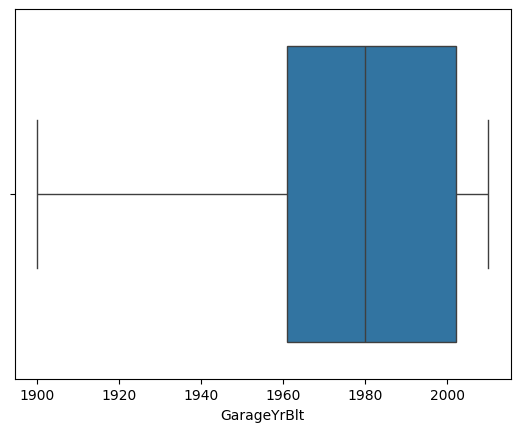

In [13]:
sns.boxplot(x=df["GarageYrBlt"])
plt.show()

In [16]:
df.drop(['Alley','PoolQC','MiscFeature','Fence','MasVnrType'],axis=1,inplace=True)

In [45]:
numTransformer = Pipeline(steps =[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
catTransformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numTransformer, ['LotFrontage','GarageYrBlt','YearBuilt']),
        ('cat', catTransformer, ['GarageType','Neighborhood'])
    ])

model_train = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
    ])


In [46]:
X = df.drop('SalePrice',axis=1)
Y = df['SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state=14)

In [47]:
model_train.fit(X_train,Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'GarageYrBlt',
                                                   'YearBuilt']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GarageType',
                                                   'Neighborhood'])])),
                ('model', LinearRegression())])

In [49]:
y_pred = model_train.predict(X_test)


In [50]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2323898355.4427314
R-squared: 0.5741927918980814
Mean Absolute Error: 33059.3954566184
